# Data Cleaning

In [85]:
# importing relevant libraries

import pandas as pd
import numpy as np

# ensuring we see all the columns in the dataframe
pd.set_option('display.max_columns', 200)

In [86]:
# importing the data from data exploration
df = pd.read_parquet('../data/01_data_exploration.parquet')

In [87]:
# looking at the first few rows of the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,None,None,Fatal(2),Destroyed,None,NC6404,Stinson,108-3,No,1.0,Reciprocating,None,None,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,None
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,None,None,Fatal(4),Destroyed,None,N5069P,Piper,PA24-180,No,1.0,Reciprocating,None,None,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,None,None,Fatal(3),Destroyed,None,N5142R,Cessna,172M,No,1.0,Reciprocating,None,None,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,None,None,Fatal(2),Destroyed,None,N1168J,Rockwell,112,No,1.0,Reciprocating,None,None,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,None,None,Fatal(1),Destroyed,None,N15NY,Cessna,501,No,NaN,None,None,None,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Ensuring only US Data is considered

In [88]:
# Removing all international data
df = df[df['Country'] == 'United States'].reset_index(drop = True).copy()

# Checking whether we only have US data
df['Country'].value_counts()

Country
United States    82248
Name: count, dtype: int64

# Cleaning up Column Names

In [89]:
# checking column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [90]:
# replacing the periods with underscores
df.columns = df.columns.str.replace(r'\.', '_', regex = True)

# checking whether the replacing worked
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,None,None,Fatal(2),Destroyed,None,NC6404,Stinson,108-3,No,1.0,Reciprocating,None,None,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,None
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,None,None,Fatal(4),Destroyed,None,N5069P,Piper,PA24-180,No,1.0,Reciprocating,None,None,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,None,None,Fatal(3),Destroyed,None,N5142R,Cessna,172M,No,1.0,Reciprocating,None,None,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,None,None,Fatal(2),Destroyed,None,N1168J,Rockwell,112,No,1.0,Reciprocating,None,None,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,None,None,Fatal(1),Destroyed,None,N15NY,Cessna,501,No,NaN,None,None,None,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Looking for Duplicates

In [91]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [92]:
df.duplicated(subset = ['Event_Id']).value_counts()

False    81355
True       893
Name: count, dtype: int64

In [93]:
df.duplicated(subset = ['Event_Id', 'Accident_Number']).sum()

np.int64(18)

In [94]:
# checking if I have duplicated aircraft accidents
df.duplicated(subset = ['Event_Id', 'Model', 'Event_Date', 'Accident_Number', 'Registration_Number']).sum()

np.int64(0)

# Visualisations & Feature Engineering

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# Investigating the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82248 entries, 0 to 82247
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                82248 non-null  object 
 1   Investigation_Type      82248 non-null  object 
 2   Accident_Number         82248 non-null  object 
 3   Event_Date              82248 non-null  object 
 4   Location                82237 non-null  object 
 5   Country                 82248 non-null  object 
 6   Airport_Code            49072 non-null  object 
 7   Airport_Name            51570 non-null  object 
 8   Injury_Severity         82140 non-null  object 
 9   Aircraft_damage         80269 non-null  object 
 10  Aircraft_Category       28154 non-null  object 
 11  Registration_Number     82132 non-null  object 
 12  Make                    82227 non-null  object 
 13  Model                   82210 non-null  object 
 14  Amateur_Built           82227 non-null

## Accident Year Distribution

In [97]:
# Converting Event_Date to datetime
df['Event_Date'] = pd.to_datetime(df['Event_Date'])

# Checking the conversion
df['Event_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 82248 entries, 0 to 82247
Series name: Event_Date
Non-Null Count  Dtype         
--------------  -----         
82248 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 642.7 KB


In [98]:
# Creating a year column
df['Year'] = df['Event_Date'].dt.year

# Previewing the data
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,None,None,Fatal(2),Destroyed,None,NC6404,Stinson,108-3,No,1.0,Reciprocating,None,None,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,None,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,None,None,Fatal(4),Destroyed,None,N5069P,Piper,PA24-180,No,1.0,Reciprocating,None,None,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,None,None,Fatal(3),Destroyed,None,N5142R,Cessna,172M,No,1.0,Reciprocating,None,None,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,None,None,Fatal(2),Destroyed,None,N1168J,Rockwell,112,No,1.0,Reciprocating,None,None,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,None,None,Fatal(1),Destroyed,None,N15NY,Cessna,501,No,NaN,None,None,None,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


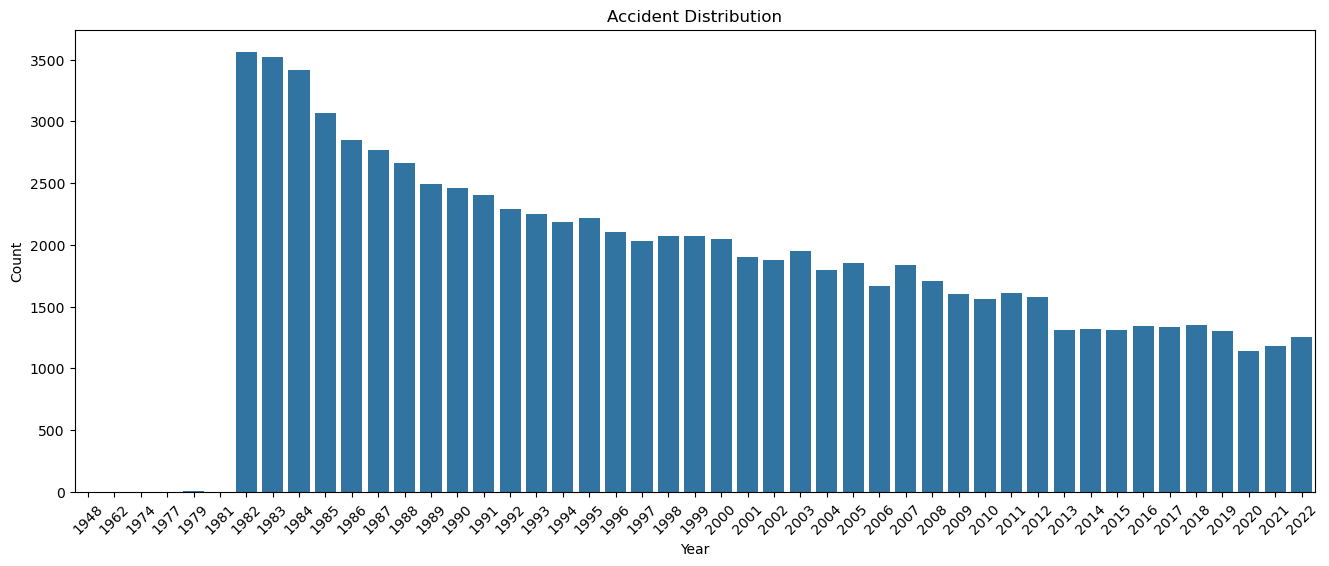

In [99]:
# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Visualising the Year distribution
sns.countplot(data = df, x = 'Year')

# Title and Axis of the plot
ax.set_title('Accident Distribution')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# Customising the plot
plt.xticks(rotation = 45)

plt.show();

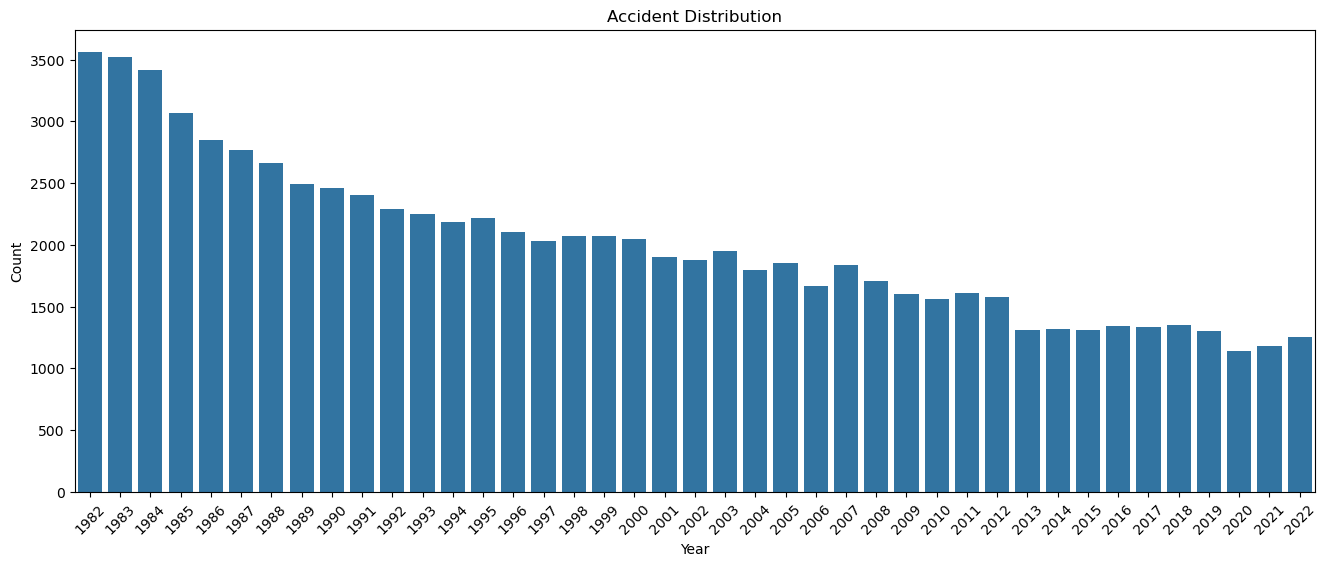

In [100]:
# Removing pre 1982 data 
df = df[df['Year'] >= 1982].copy()

# Creating the figure
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Visualising the Year distribution
sns.countplot(data = df, x = 'Year')

# Title and Axis of the plot
ax.set_title('Accident Distribution')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# Customising the plot
plt.xticks(rotation = 45)

plt.show();

## Finding total people in an accident

In [101]:
# Filling missing values with 0
df[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = df[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']].fillna(0)

# Creating a column for total people in an accident
df['People_Onboard'] = df[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']].sum(axis = 1).astype(int)

# Showing a sample of the new column
df['People_Onboard'].head()

7     2
8     2
9     3
10    1
11    1
Name: People_Onboard, dtype: int64

# Make & Model Missing Values

In [102]:
# Dropping Makes and Models with missing values
df = df.dropna(subset = ['Make', 'Model']).copy()

# Previewing the dataset
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1


# Weather Conditions

In [103]:
# Looking at the weather conditions present in our dataframe
df['Weather_Condition'].value_counts(normalize = True)

Weather_Condition
VMC    0.923016
IMC    0.068818
UNK    0.006683
Unk    0.001484
Name: proportion, dtype: float64

In [104]:
# Cleaning the weather conditions
df['Weather_Condition'] = df['Weather_Condition'].replace({'Unk': 'UNK'})  # Merge categories

weather_proportions = df['Weather_Condition'].value_counts(normalize=True)

print(weather_proportions)

Weather_Condition
VMC    0.923016
IMC    0.068818
UNK    0.008167
Name: proportion, dtype: float64


In [105]:
# Dropping the unknown weather conditions
df = df[df['Weather_Condition'] != 'UNK'].copy()

df.dropna(subset = 'Weather_Condition', inplace = True)

# Confirming that it was dropped
df['Weather_Condition'].value_counts(normalize = True)

Weather_Condition
VMC    0.930616
IMC    0.069384
Name: proportion, dtype: float64

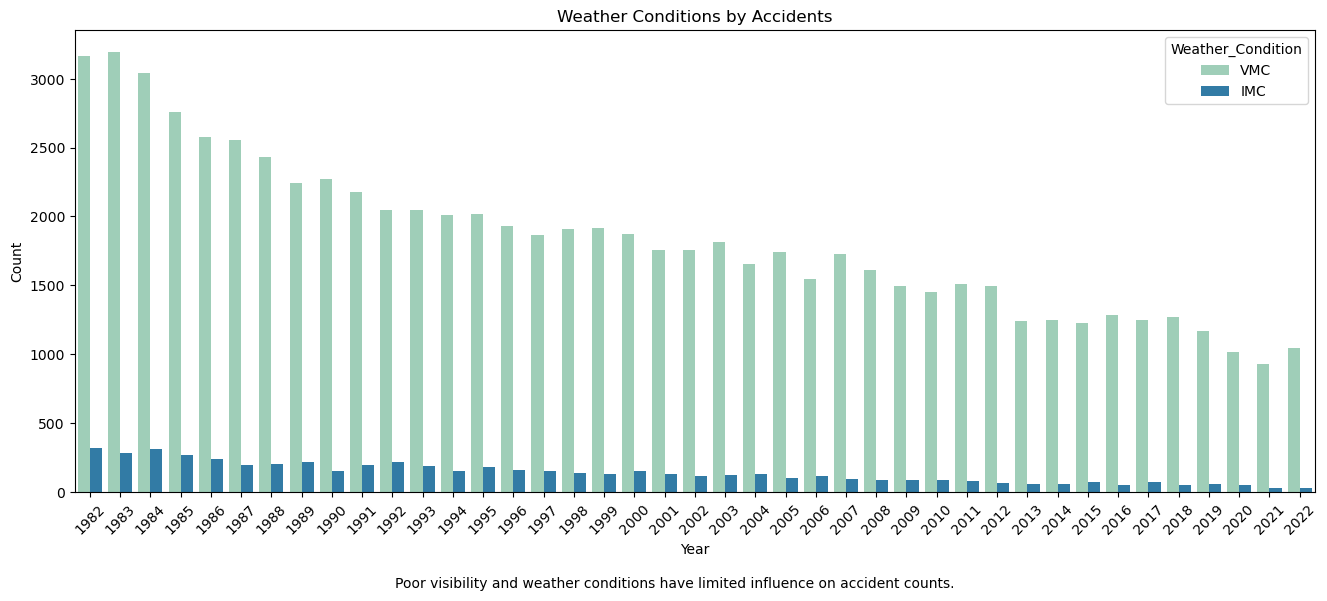

In [106]:
# Creating the plot
fig, ax = plt.subplots(1, 1, figsize = (16, 6))

# Visualising the distribution between cleaar and unclear weather
sns.countplot(data = df, x = 'Year', hue = 'Weather_Condition', palette = 'YlGnBu')

# Axis and Title Labels
ax.set_title('Weather Conditions by Accidents')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# Customising the plot
plt.xticks(rotation = 45)
plt.figtext(0.5, -0.05, s = 'Poor visibility and weather conditions have limited influence on accident counts.', ha = 'center')

# Showing the plot
plt.show()

# Adding State Data

In [107]:
# Importing data on US States
states_df = pd.read_csv('../data/us_state_codes.csv')

# Showing a preview
states_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [108]:
# Dropping missing values in Location
df.dropna(subset = 'Location', inplace = True)

# Creating State Abbreviation Column
df['Abbreviation'] = df['Location'].map(lambda x: x[-2:])

df['Abbreviation'].head()


7     WA
8     NJ
9     FL
10    NM
11    AL
Name: Abbreviation, dtype: object

In [109]:
# Making abbreviaiton the index of the states_df
states_df.set_index('Abbreviation', inplace = True)

# Margin the two dataframes
df = df.join(other = states_df, on = 'Abbreviation').copy()

# Previewing the data
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard,Abbreviation,US_State
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2,WA,Washington
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2,NJ,New Jersey
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3,FL,Florida
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1,NM,New Mexico
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1,AL,Alabama


# Purpose of Flight

In [110]:
# Items in Flight Purpose
df['Purpose_of_flight'].value_counts(normalize = False)

Purpose_of_flight
Personal                     47851
Instructional                10359
Unknown                       5605
Aerial Application            4597
Business                      3775
Positioning                   1535
Other Work Use                1179
Ferry                          719
Aerial Observation             695
Public Aircraft                645
Executive/corporate            505
Flight Test                    388
Skydiving                      171
External Load                  110
Banner Tow                     101
Public Aircraft - Federal       97
Air Race show                   82
Public Aircraft - Local         71
Public Aircraft - State         63
Air Race/show                   57
Glider Tow                      52
Firefighting                    28
Air Drop                         8
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [111]:
# Purpose Counts Variable
purpose_counts = df['Purpose_of_flight'].value_counts(normalize = False)

# Removing Missing Values
df.dropna(subset = 'Purpose_of_flight', inplace = True)

# Removing the Uknown, ASHO, PUBS and PUBL
df = df[~df['Purpose_of_flight'].isin(['Unknown', 'ASHO', 'PUBS', 'PUBL', 'Other Work Use'])].copy()

# Removing Purposes with less than 1500 accidents
df = df[df['Purpose_of_flight'].isin(purpose_counts[purpose_counts >= 1500].index)].copy()

# Preview
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year,People_Onboard,Abbreviation,US_State
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,None,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,None,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,2,WA,Washington
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,None,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,2,NJ,New Jersey
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,None,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,3,FL,Florida
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,None,None,Non-Fatal,Substantial,None,N44832,Piper,PA-28-161,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,1,NM,New Mexico
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,None,TUSKEGEE,Non-Fatal,Substantial,None,N4275S,Beech,V35B,No,1.0,Reciprocating,None,None,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,1,AL,Alabama


In [112]:
df['Purpose_of_flight'].value_counts(normalize = False)

Purpose_of_flight
Personal              47851
Instructional         10359
Aerial Application     4597
Business               3775
Positioning            1535
Name: count, dtype: int64

In [119]:
df.shape

(68117, 32)

# Data Types

In [123]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68117 entries, 7 to 82245
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                68117 non-null  object        
 1   Investigation_Type      68117 non-null  object        
 2   Accident_Number         68117 non-null  object        
 3   Event_Date              68117 non-null  datetime64[ns]
 4   Location                68117 non-null  object        
 5   Country                 68117 non-null  object        
 6   Airport_Code            41509 non-null  object        
 7   Airport_Name            43824 non-null  object        
 8   Injury_Severity         68110 non-null  object        
 9   Aircraft_damage         67615 non-null  object        
 10  Aircraft_Category       23439 non-null  object        
 11  Registration_Number     68056 non-null  object        
 12  Make                    68117 non-null  object     

# Save Off

In [124]:
# Saving off the file
df.to_parquet('../data/02_data_cleaning.parquet')